In [ ]:
# Hoang Dieu Linh
# ID: 11202127

# EX1

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

# Input and target data for the XOR problem
inputs = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
targets = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

# Define the neural network
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.layer1 = nn.Linear(2, 2)  # Input layer
        self.layer2 = nn.Linear(2, 1)  # Output layer

    def forward(self, x):
        x = torch.sigmoid(self.layer1(x))  # Sigmoid activation for the hidden layer
        x = torch.sigmoid(self.layer2(x))  # Sigmoid activation for the output layer
        return x

# Initialize the model and optimization
model = XORModel()
optimizer = optim.SGD(model.parameters(), lr=0.1)
criterion = nn.MSELoss()

# Train the model
num_epochs = 10000
for epoch in range(num_epochs):
    # Compute the model's predicted outputs
    outputs = model(inputs)
    
    # Calculate the loss
    loss = criterion(outputs, targets)
    
    # Clear gradients and backpropagate
    optimizer.zero_grad()
    loss.backward()
    
    # Update the weights
    optimizer.step()
    
    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

# Evaluate the model
with torch.no_grad():
    predicted = model(inputs)
    predicted = (predicted > 0.5).float()  # Convert outputs to 0 or 1 based on a threshold of 0.5
    accuracy = (predicted == targets).sum().item() / len(targets)
    print(f'Accuracy: {accuracy * 100:.2f}%')

# Print the learned weights
print("Hidden layer weights:")
print(model.layer1.weight)
print("Output layer weights:")
print(model.layer2.weight)


Epoch [1000/10000], Loss: 0.24980191886425018
Epoch [2000/10000], Loss: 0.24951764941215515
Epoch [3000/10000], Loss: 0.24890929460525513
Epoch [4000/10000], Loss: 0.24737311899662018
Epoch [5000/10000], Loss: 0.24324986338615417
Epoch [6000/10000], Loss: 0.23293232917785645
Epoch [7000/10000], Loss: 0.2142535150051117
Epoch [8000/10000], Loss: 0.19575709104537964
Epoch [9000/10000], Loss: 0.18081042170524597
Epoch [10000/10000], Loss: 0.1628636121749878
Accuracy: 75.00%
Hidden layer weights:
Parameter containing:
tensor([[-1.0561, -0.9370],
        [ 4.2818,  4.2674]], requires_grad=True)
Output layer weights:
Parameter containing:
tensor([[1.4529, 3.4050]], requires_grad=True)


# EX2

In [ ]:
# implement 

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Define transformations to apply to the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load the MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Define batch size for training and testing
batch_size = 64

# Create data loaders for training and testing
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Create an instance of the neural network
net = Net()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}] Loss: {running_loss / (i+1):.4f}')

print('Finished Training')

# Test the model on the test dataset
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on the test dataset: {accuracy:.2f}%')

Epoch [1/5] Loss: 0.3844
Epoch [2/5] Loss: 0.1862
Epoch [3/5] Loss: 0.1404
Epoch [4/5] Loss: 0.1132
Epoch [5/5] Loss: 0.0960
Finished Training
Accuracy on the test dataset: 96.88%


In [ ]:
# Change learning rate

Epoch [1/5] Loss: 3.0665
Epoch [2/5] Loss: 2.3100
Epoch [3/5] Loss: 2.3092
Epoch [4/5] Loss: 2.3101
Epoch [5/5] Loss: 2.3102
Epoch [1/5] Loss: 0.3941
Epoch [2/5] Loss: 0.2760
Epoch [3/5] Loss: 0.2448
Epoch [4/5] Loss: 0.2525
Epoch [5/5] Loss: 0.2305
Epoch [1/5] Loss: 0.3925
Epoch [2/5] Loss: 0.1943
Epoch [3/5] Loss: 0.1439
Epoch [4/5] Loss: 0.1138
Epoch [5/5] Loss: 0.0972
Epoch [1/5] Loss: 0.7827
Epoch [2/5] Loss: 0.3452
Epoch [3/5] Loss: 0.2964
Epoch [4/5] Loss: 0.2661
Epoch [5/5] Loss: 0.2416


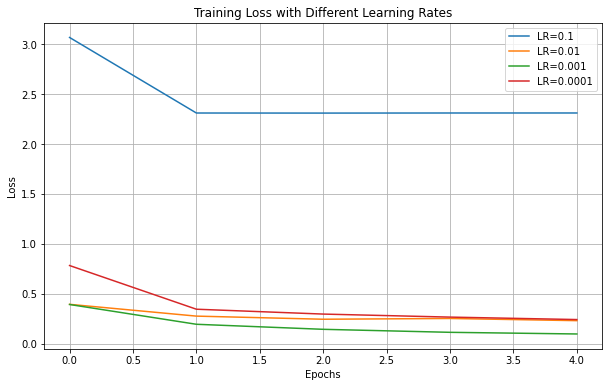

In [6]:
# Initialize a list to store loss history for each learning rate
learning_rates = [0.1, 0.01, 0.001, 0.0001]
loss_history = []

for lr in learning_rates:
    # Create an instance of the neural network
    net = Net()

    # Define the loss function and optimizer with the current learning rate
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=lr)

    # Training loop
    num_epochs = 5
    train_loss_history = []

    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f'Epoch [{epoch+1}/{num_epochs}] Loss: {running_loss / (i+1):.4f}')
        train_loss_history.append(running_loss / (i+1))

    loss_history.append(train_loss_history)

# Plot the loss curves for each learning rate
plt.figure(figsize=(10, 6))
for i, lr in enumerate(learning_rates):
    plt.plot(range(num_epochs), loss_history[i], label=f'LR={lr}')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss with Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Chia tập train/test tỉ lệ 80/20, tính các chỉ số MSE, RSME, MAE, MAPE trên tập test

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
mnist_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)

# Split the dataset into training and testing sets (80% training, 20% testing)
total_size = len(mnist_dataset)
train_size = int(0.8 * total_size)
test_size = total_size - train_size
train_dataset, test_dataset = torch.utils.data.random_split(mnist_dataset, [train_size, test_size])

batch_size = 64
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Define and train your neural network (you can use the previous code)

# Evaluate the model on the test set
model.eval()
all_labels = []
all_predictions = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted.numpy())

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(all_labels, all_predictions)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(all_labels, all_predictions)

# Calculate the Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs(np.array(all_labels) - np.array(all_predictions)) / np.array(all_labels)) * 100

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.4f}%')


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1792x28 and 2x2)

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Split the dataset into training and testing sets (80% training, 20% testing)
total_size = len(train_dataset)
train_size = int(0.8 * total_size)
test_size = total_size - train_size
train_dataset, test_dataset = torch.utils.data.random_split(train_dataset, [train_size, test_size])

# Evaluation on the test set
net.eval()
true_labels = []
predicted_labels = []

with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        true_labels.extend(labels.numpy())
        predicted_labels.extend(predicted.numpy())

# Calculate MSE, RMSE, MAE, and MAPE
mse = mean_squared_error(true_labels, predicted_labels)
rmse = np.sqrt(mse)
mae = mean_absolute_error(true_labels, predicted_labels)
mape = np.mean(np.abs((np.array(true_labels) - np.array(predicted_labels)) / np.array(true_labels))) * 100

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

Mean Squared Error (MSE): 1.199
Root Mean Squared Error (RMSE): 1.094988584415381
Mean Absolute Error (MAE): 0.2494
Mean Absolute Percentage Error (MAPE): nan%


<ipython-input-9-380c0a161231>:28: RuntimeWarning: divide by zero encountered in true_divide
  mape = np.mean(np.abs((np.array(true_labels) - np.array(predicted_labels)) / np.array(true_labels))) * 100
<ipython-input-9-380c0a161231>:28: RuntimeWarning: invalid value encountered in true_divide
  mape = np.mean(np.abs((np.array(true_labels) - np.array(predicted_labels)) / np.array(true_labels))) * 100


# EX3

The softmax function uses the exponential function with the base 'e' (the natural logarithm base) mainly because of the properties of the 'e' exponential function that make it suitable and reasonable for multi-class classification problems and probability representation. Here are some reasons why 'e' is typically used in softmax:

1. **Probability Property:** The softmax function is used to represent the probabilities of different classes. The 'e' exponential function ensures that the output of softmax is always within the range [0, 1], which is a reasonable probability range.

2. **Ability to Distinguish Differences:** The 'e' exponential function has the property of rapid increase, which creates differences between input values. When one input value is significantly higher than the others, its corresponding output from softmax will also be higher, resulting in a higher probability. This allows the model to distinguish between classes effectively.

3. **Related to Probability and Nature:** The 'e' exponential function is a natural exponentiation function that frequently appears in probability and natural processes. For example, the Poisson distribution and the standard normal distribution are based on the 'e' exponential function. Using 'e' ensures a natural connection of softmax probability results to probability theory and statistics.

4. **Ease of Derivative Calculation:** The 'e' exponential function has an easily computable derivative. This is crucial when training models using gradient descent algorithms to adjust parameters.

In summary, using the 'e' exponential function in the softmax function is a natural and reasonable choice for representing probabilities and making multi-class classification models work effectively and naturally. Question is why not using other constants like 2, 3, or 4, the primary reason is that these constants do not possess the properties that 'e' offers, especially in the context of probability representation. Other constants would not provide the same behavior and mathematical properties that make softmax suitable for classification problems. 